### 1. Setup and Local Data

1.1 Setting up

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
print(len(gpus))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1


In [5]:
# Avoid OOM (Out Of Memory) errors by setting GPU Memory Consumption Growth 
# OOM error occurs when a program or process tries to use more memory (RAM) than is available on the system, causing it to fail or crash. In the context of deep learning and TensorFlow, OOM errors often happen when training large models or using large batch sizes, especially on GPUs with limited memory
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) # helps to limit the memory use

1.2 Remove Dodgy Images

In [6]:
import cv2 #computer vision module
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data'

In [8]:
os.listdir('data')

['happy', 'sad']

In [9]:
# os.listdir(os.path.join(data_dir, 'happy'))  # lists all the images inside the happy folder

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png'] # can be used to index/ select each extensions seperately

<class 'numpy.ndarray'> (933, 1400, 3)


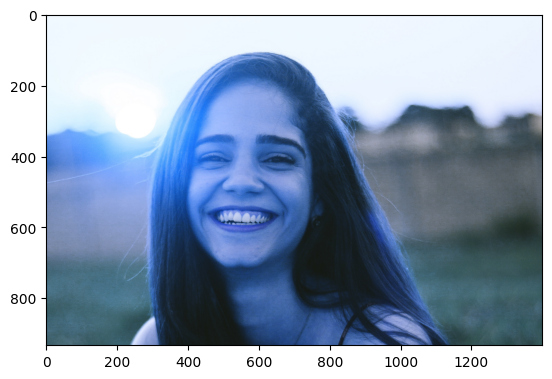

In [11]:
# to load an image
img = cv2.imread(os.path.join('data', 'happy', '1HEoLBLidT2u4mhJ0oiDgig.png'))
print(type(img),img.shape)
plt.imshow(img) # the image color is weird since open-cv reads image in bgr format
plt.show()

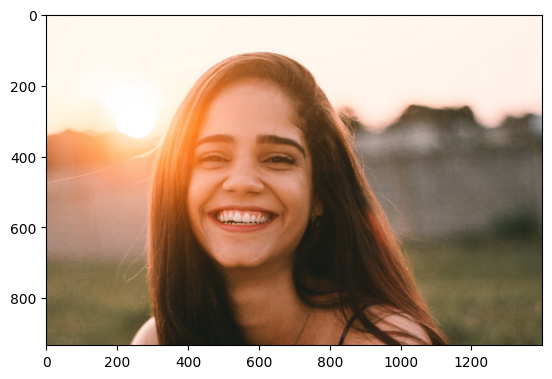

In [12]:
# to fix the color format
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
for image_class in os.listdir(data_dir): # ie, happy and sad
    for image in os.listdir(os.path.join(data_dir, image_class)): # list the elements in data\happy and data\sad
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) # loads the image into open-cv
            tip = imghdr.what(image_path) # selects the image extensions
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path) # removes those extensions which are not in the image_exts list
        except Exception as e:
            print(f'Issue with image {image_path}')
            #  os.remove(image_path)

1.3 Load Data

In [14]:
# Tensorflow has a dataset api. It allows you to build data pipelines rather than loading everything into memory.
# tf.data.Dataset?? # ?? will give the documentation (in jupyter)
# we are not using the api directly, we use a keras utility which allows us to do it

In [15]:
import numpy as np
from matplotlib import pyplot as pyplot

In [16]:
# tf.keras.utils.image_dataset_from_directory??

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 148 files belonging to 2 classes.


In [18]:
type(data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [19]:
# to select the data we need an iterator (because we can't select it like data[0])
# ie, it allows us to access the data pipeline
data_iterator = data.as_numpy_iterator() 
data_iterator

In [20]:
# Get another batch from the iterator (run this to get another batch)
batch = data_iterator.next() 

In [21]:
batch

(array([[[[6.18515625e+01, 6.18515625e+01, 5.18515625e+01],
          [6.12856903e+01, 6.12856903e+01, 5.12856903e+01],
          [6.10191193e+01, 6.10191193e+01, 5.10191193e+01],
          ...,
          [7.40000000e+01, 6.90000000e+01, 7.50000000e+01],
          [7.40000000e+01, 6.90000000e+01, 7.50000000e+01],
          [7.40000000e+01, 6.90000000e+01, 7.50000000e+01]],
 
         [[6.90000000e+01, 7.10742188e+01, 6.02226562e+01],
          [6.70687103e+01, 6.91429291e+01, 5.82913666e+01],
          [6.79936218e+01, 7.00000000e+01, 5.91823578e+01],
          ...,
          [7.40000000e+01, 6.90000000e+01, 7.50000000e+01],
          [7.40000000e+01, 6.90000000e+01, 7.50000000e+01],
          [7.40000000e+01, 6.90000000e+01, 7.50000000e+01]],
 
         [[6.60933380e+01, 7.04644318e+01, 6.10074005e+01],
          [6.75365906e+01, 7.18059235e+01, 6.23828125e+01],
          [6.65822449e+01, 6.90859375e+01, 6.03340912e+01],
          ...,
          [7.40000000e+01, 6.90000000e+01, 7.5000

In [22]:
len(batch) # it will give 2. this is because there is 2 parts to the tuple/dataset. 
# first part : image representation
# second part: label

2

In [23]:
# Images represented as numpy arrays
batch[0].shape # the shape is due to tf.keras.utils.image_dataset_from_directory, 
# since it automatically reshapes the image into (256, 256) ensuring consistant size
# it also batches them up into a batch size of 32
# we can also configure them like we want:
# tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128, 128))

(32, 256, 256, 3)

In [24]:
# Labels
batch[1]
# ie, 1 is gonna represent wither happy or sad and 0 the opposite

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

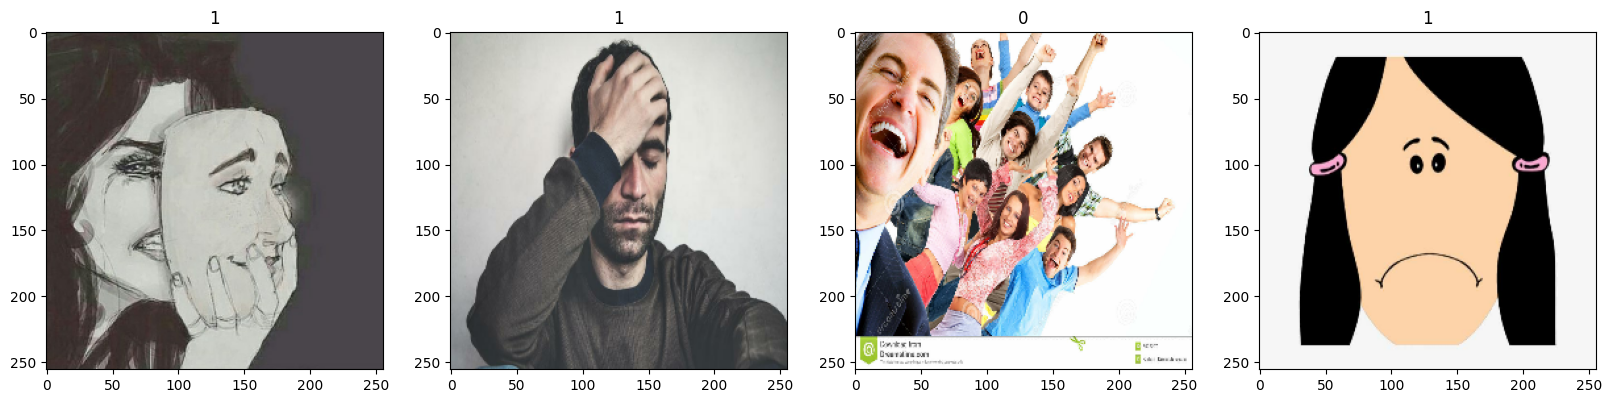

In [25]:
# from this we can understand that,
# Class 1 = SAD perople & Class 0 = HAPPY people 
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # fig is the overall figure object & ax is a list/NumPy array of 4 axes ojects(one for each subplot/axes).
for idx, img in enumerate(batch[0][:4]): # batch[0] is the batch of images, here we selects first 4 images from the batch, idx is the index
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) # batch[1] is the array of labels and idx is the index of the subplots,so with batch[1][idx] we ge the label from the current image (ie, 0 or 1 ) that is shown above the image

## 2. Preprocessing Data

In [26]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [27]:
# when we are building deep learning models, we want the values to be as small as possible(for optimization purpose)
# so we devide the values by 255, this will give us the values between 0 and 1
scaled = batch[0]/255
scaled

array([[[[2.42555141e-01, 2.42555141e-01, 2.03339458e-01],
         [2.40336046e-01, 2.40336046e-01, 2.01120347e-01],
         [2.39290670e-01, 2.39290670e-01, 2.00074971e-01],
         ...,
         [2.90196091e-01, 2.70588249e-01, 2.94117659e-01],
         [2.90196091e-01, 2.70588249e-01, 2.94117659e-01],
         [2.90196091e-01, 2.70588249e-01, 2.94117659e-01]],

        [[2.70588249e-01, 2.78722435e-01, 2.36167282e-01],
         [2.63014555e-01, 2.71148741e-01, 2.28593588e-01],
         [2.66641647e-01, 2.74509817e-01, 2.32087672e-01],
         ...,
         [2.90196091e-01, 2.70588249e-01, 2.94117659e-01],
         [2.90196091e-01, 2.70588249e-01, 2.94117659e-01],
         [2.90196091e-01, 2.70588249e-01, 2.94117659e-01]],

        [[2.59189546e-01, 2.76331097e-01, 2.39244714e-01],
         [2.64849365e-01, 2.81591862e-01, 2.44638488e-01],
         [2.61106849e-01, 2.70925254e-01, 2.36604273e-01],
         ...,
         [2.90196091e-01, 2.70588249e-01, 2.94117659e-01],
         [

In [28]:
print(scaled.min())
print(scaled.max())

0.0
1.0


2.1 Scale Data

In [29]:
# but we are using a data pipeline, so we can't do this everytime we load a batch
# so for effenciency we do it as we are loading in the data through the data pipeline (using the data pipeline capablity)
data = data.map(lambda x,y: (x/255, y)) 

In [30]:
scaled_iterator = data.as_numpy_iterator() 

In [31]:
batch = scaled_iterator.next() # to grab the next batch (same as the data iterator used above)

In [32]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


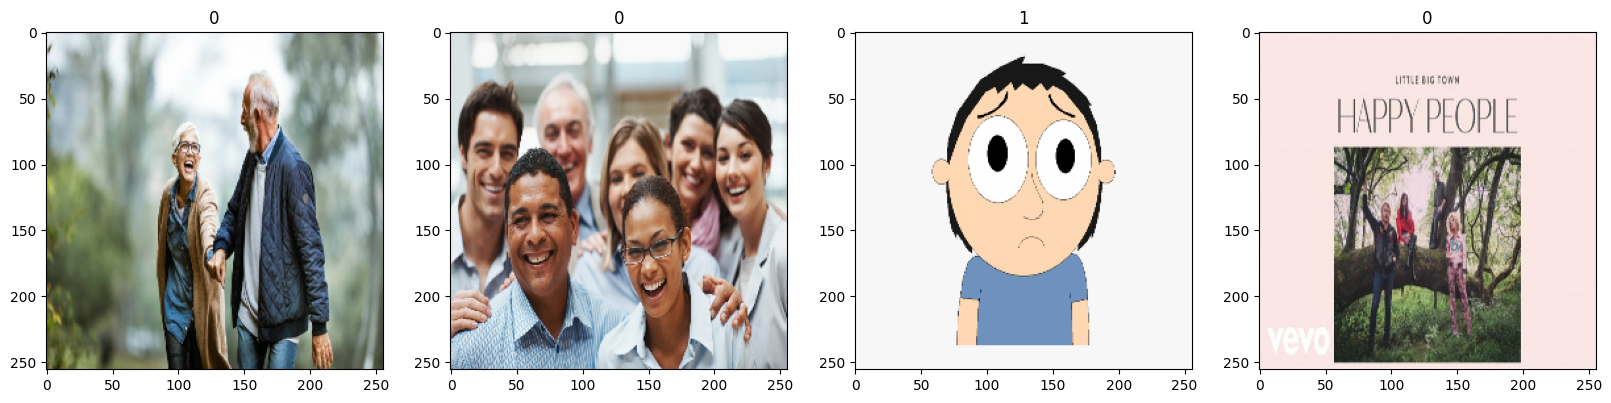

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) 
for idx, img in enumerate(batch[0][:4]): 
    ax[idx].imshow(img.astype(float)) # different from the visualization fn. used above we use float here instead of int, since we have devided the values with 255 it becomes float or just use: 
    # ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [34]:
len(data) # here we have 5 batches and each should have 32 images

5

In [35]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1 # to make its total to 5 (and in this case to make it from 0 to 1)

In [36]:
print(train_size,val_size,test_size)
print(train_size+val_size+test_size) # it will dive the total no. of batches (len(data))

3 1 1
5


In [37]:
# take: how much data we are going to take in that particular partetion
# skip: skips those particular data
# after the above step the data is split into segments, so first we take the first segment for training, then we skip it and select the second segment for val and finally we skip the first and the second segment to take the third segment as test
train = data.take(train_size) # 
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [38]:
print(len(train),len(val),len(test))

3 1 1


## 3. Deep Model

3.1 Build Deep Learning Model

In [39]:
from tensorflow.keras.models import Sequential # Sequential api is used for models with a single input and output, and layers arranged in a linear stack.
                                               # Functional api is used for models with multiple inputs/outputs or complex architectures (e.g., branching, merging).
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
# Conv2D: 2D convolution layer, applies convolution operation to images
# MaxPool2d: Max pooling layer which acts as a condensing layer (goes through the images and condenses it down ie, returns the region with the max value of that region, rather than returning all of the data from the convolusion)
#          :  Downsamples input by taking the maximum value over a window in the feature map
# Dense: this is a fully connected layer availabe through keras
# Flatten: Flatten converts multi-dimensional input (e.g., from Conv2D) to 1D, so it can be fed into Dense layers
# Dropout: Regularization layer that randomly sets input units to 0 during training

In [40]:
model = Sequential()

In [41]:
# MaxPool2D??

In [42]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3))) # whenever we are passing in a first layer it needs to have an input ie, here itis 256px high x 256px wide x 3 channels deep, here the convolusion has 16 filters, a filter is of size 3px x 3px, and moves 1 px each time (stride=1) by default, with relu we convert the -ve values to 0 and +ve values remains the same without change
model.add(MaxPool2D()) # it takes a 2 x 2 region and takes the max value from that region

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten()) # converts multi-dimensional input (e.g., from Conv2D) to 1D, so it can be fed into Dense layers

model.add(Dense(256, activation='relu')) # Dense layer with 256 units and ReLU activation (hidden layer)
model.add(Dense(1, activation='sigmoid')) # then finally 1 value as the output, this is the final output, suitable for binary classification (output between 0 and 1 ie, happy or sad)
# 1 neuron with sigmoid activation outputs a value between 0 and 1, representing the probability of the input belonging to the positive class (for binary classification).

### Summary Table

| Layer               | Purpose                                                   |
|---------------------|-----------------------------------------------------------|
| `Conv2D(16)`        | Extracts 16 basic features from input                     |
| `MaxPool2D`         | Downsamples feature maps                                  |
| `Conv2D(32)`        | Extracts 32 more complex features                         |
| `MaxPool2D`         | Downsamples again                                         |
| `Conv2D(16)`        | Further feature extraction, possibly reducing complexity  |
| `MaxPool2D`         | Downsamples again                                         |
| `Flatten`           | Converts 3D feature maps to 1D vector                     |
| `Dense(256)`        | Learns complex combinations of features (hidden layer)   |
| `Dense(1, sigmoid)` | Outputs probability for binary classification (final layer) |


### What is a Feature Map?

In a Convolutional Neural Network (CNN), after a `Conv2D` layer processes an image, it produces a set of 2D arrays called **feature maps**.

- Each feature map highlights specific patterns or features in the input, such as **edges, textures, or shapes**.
- These maps help the model understand the spatial hierarchy in images.

---

### What Does "Downsampling" Mean?

**Downsampling** refers to reducing the spatial dimensions (height and width) of the feature maps. This is done to:

- Reduce the amount of data and computation.
- Emphasize the most important features.
- Help prevent overfitting.

#### `MaxPool2D`: Downsampling via Max Pooling

- The `MaxPool2D` layer reduces the spatial size of the feature maps.
- It works by taking the **maximum value** from small, non-overlapping regions (e.g., 2×2) in the feature map.
- This retains the most significant information while discarding less important details.

#### Example:

A 4×4 feature map:

##### [1 3 2 4]
##### [5 6 7 8]
##### [9 2 1 3]
##### [4 5 6 7]


After applying 2×2 max pooling:

##### [6 8]
##### [9 7]

In [43]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
# adam is the optimizer
# accuracy as matrics will tell us how well our model is classifying as either 0 or 1

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [45]:
# maxpooling is halfing the results of the convolusion
# 30*30*16 (from the last maxpooling) = 14400 is the result we get in the flatten (from the last maxpooling)
# ie, we are converting/condensing it into a single dimension
# then we pass it to dense layer with 256 neurons and finally go down to a single output layer (257 is weight from neurons + biased term)


3.2 Train

In [46]:
logdir = 'logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
3/3 [==============================] - 7s 853ms/step - loss: 0.8428 - accuracy: 0.5521 - val_loss: 0.6860 - val_accuracy: 0.5312
Epoch 2/20
3/3 [==============================] - 3s 767ms/step - loss: 0.6782 - accuracy: 0.5938 - val_loss: 0.6602 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 3s 749ms/step - loss: 0.6013 - accuracy: 0.6146 - val_loss: 0.6466 - val_accuracy: 0.4375
Epoch 4/20
3/3 [==============================] - 3s 676ms/step - loss: 0.6015 - accuracy: 0.6250 - val_loss: 0.4601 - val_accuracy: 0.8438
Epoch 5/20
3/3 [==============================] - 3s 725ms/step - loss: 0.5087 - accuracy: 0.8438 - val_loss: 0.5318 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 3s 705ms/step - loss: 0.4696 - accuracy: 0.8021 - val_loss: 0.4756 - val_accuracy: 0.7812
Epoch 7/20
3/3 [==============================] - 3s 750ms/step - loss: 0.3671 - accuracy: 0.8438 - val_loss: 0.4591 - val_accuracy: 0.8438
Epoch 8/20
3/3 [====

In [49]:
hist

In [50]:
hist.history

{'loss': [0.8427755236625671,
  0.6782474517822266,
  0.6013372540473938,
  0.6015352606773376,
  0.5087085962295532,
  0.4695810377597809,
  0.36708077788352966,
  0.38532546162605286,
  0.26745155453681946,
  0.23257911205291748,
  0.1955772489309311,
  0.19845129549503326,
  0.20563900470733643,
  0.1756100207567215,
  0.15233659744262695,
  0.08294012397527695,
  0.07511076331138611,
  0.06406384706497192,
  0.05938403308391571,
  0.04468800500035286],
 'accuracy': [0.5520833134651184,
  0.59375,
  0.6145833134651184,
  0.625,
  0.84375,
  0.8020833134651184,
  0.84375,
  0.8333333134651184,
  0.8958333134651184,
  0.96875,
  0.9583333134651184,
  0.9270833134651184,
  0.90625,
  0.9479166865348816,
  0.9479166865348816,
  0.9895833134651184,
  0.9791666865348816,
  0.9895833134651184,
  0.9895833134651184,
  1.0],
 'val_loss': [0.6860103607177734,
  0.6602458953857422,
  0.6466331481933594,
  0.4600541591644287,
  0.5318087339401245,
  0.4756278395652771,
  0.45910918712615967,
  

3.3 Plot Performance

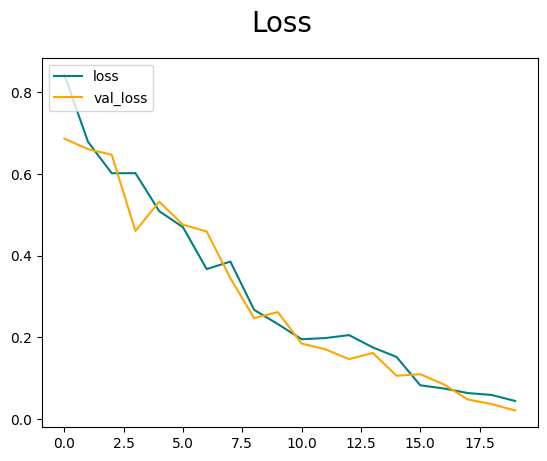

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

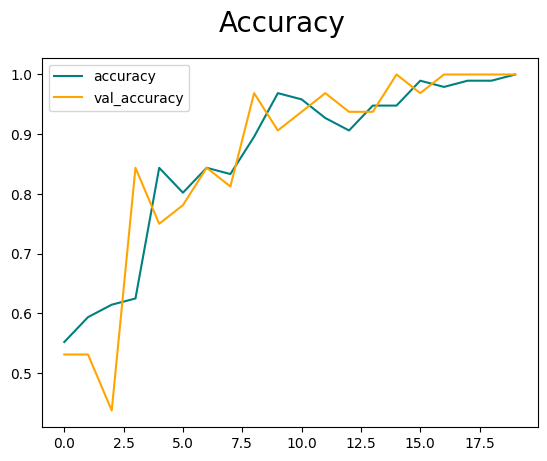

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

### 4. Evaluate Performance

4.1 Evaluate

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 577ms/step


In [56]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}') # .numpy() isn't really necessary

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


4.2 Test

In [57]:
import cv2

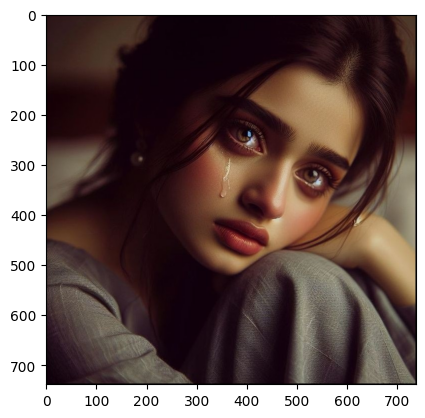

In [58]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

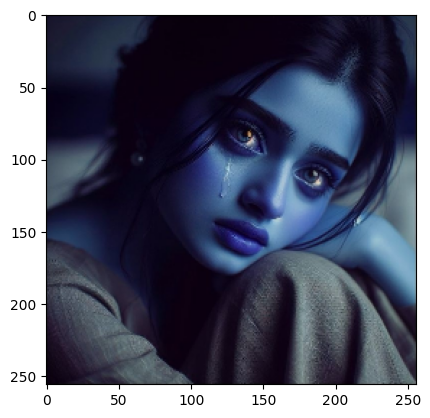

In [59]:
# when we pass the data to the neural network it should be in the shape 256,256,3
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
resize # initially

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 17.05931   ,  18.997284  ,  26.81807   ],
        [ 18.0522    ,  18.0522    ,  31.455963  ],
        [ 19.493729  ,  18.552322  ,  34.217926  ],
        ...,
        [ 41.146072  ,  49.61873   ,  63.384354  ],
        [ 40.314987  ,  48.787643  ,  62.55327   ],
        [ 31.0186    ,  37.553284  ,  46.432663  ]],

       [[ 18.828125  ,  18.828125  ,  32.242188  ],
        [ 19.092697  ,  16.44426   ,  37.679337  ],
        [ 23.12819   ,  20.011002  ,  42.486847  ],
        ...,
        [ 37.82422   ,  51.82422   ,  73.296875  ],
        [ 36.648438  ,  50.648438  ,  72.12109   ],
        [ 42.36328   ,  50.339493  ,  60.2706    ]],

       [[ 20.321136  ,  19.37973   ,  35.121094  ],
        [ 19.64772   ,  16.582031  ,  38.95488   ],
        [ 23.792648  ,  19.706818  ,  44.87848   ],
        ...,
        [ 35.70703   ,  52.91417   ,  78.292755  ],
        [ 33.82422   ,  51.406967  ,  75.65872   ],
        [ 43.80848

In [61]:
resize.shape

TensorShape([256, 256, 3])

In [62]:
# our neural network expects us to pass through a batch of images (not a single image)
# so we need to encapsulate it inside of another set of parenthesis or arrays
np.expand_dims(resize, 0)

array([[[[ 17.05931   ,  18.997284  ,  26.81807   ],
         [ 18.0522    ,  18.0522    ,  31.455963  ],
         [ 19.493729  ,  18.552322  ,  34.217926  ],
         ...,
         [ 41.146072  ,  49.61873   ,  63.384354  ],
         [ 40.314987  ,  48.787643  ,  62.55327   ],
         [ 31.0186    ,  37.553284  ,  46.432663  ]],

        [[ 18.828125  ,  18.828125  ,  32.242188  ],
         [ 19.092697  ,  16.44426   ,  37.679337  ],
         [ 23.12819   ,  20.011002  ,  42.486847  ],
         ...,
         [ 37.82422   ,  51.82422   ,  73.296875  ],
         [ 36.648438  ,  50.648438  ,  72.12109   ],
         [ 42.36328   ,  50.339493  ,  60.2706    ]],

        [[ 20.321136  ,  19.37973   ,  35.121094  ],
         [ 19.64772   ,  16.582031  ,  38.95488   ],
         [ 23.792648  ,  19.706818  ,  44.87848   ],
         ...,
         [ 35.70703   ,  52.91417   ,  78.292755  ],
         [ 33.82422   ,  51.406967  ,  75.65872   ],
         [ 43.808487  ,  52.281143  ,  62.088196  ]],

In [63]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [64]:
yhat = model.predict(np.expand_dims(resize/255,0)) # by deviding it by 256 we are scaling the image

1/1 [==============================] - 0s 158ms/step


In [65]:
yhat

array([[0.99810153]], dtype=float32)

In [66]:
if yhat > 0.5:
    print('Predicted class is SAD')
else:
    print('Predicted class is HAPPY')

Predicted class is SAD


## 5. Save Model

5.1 Save the Model

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [69]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [70]:
new_model

In [71]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 141ms/step


In [72]:
if yhat > 0.5:
    print('Predicted class is SAD')
else:
    print('Predicted class is HAPPY')

Predicted class is SAD
